# Population change visualizations

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Data

In [2]:
c = 'Monterrey'
res = 8

In [3]:
grl_dir = '/workspaces/accesibilidad-urbana/data/processed/pop_change/'
hex_pop = gpd.read_file(grl_dir+f'{c}_Census_10_20_BlockAnalysis_res{res}.geojson', driver='GeoJSON')
hex_tp = gpd.read_file(grl_dir+f'{c}_HexRes{res}_MassPublicTransport.geojson', driver='GeoJSON')

In [4]:
print(hex_pop.shape)
hex_pop.head(2)

(1490, 430)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,Z_RTViv_10_20,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,R_TVivDes_10_20,DensPob_10_20,geometry
0,8848a205b1fffff,10619.0,5338.0,5281.0,447.0,156.0,187.0,10127.0,5100.0,5027.0,...,None,0.898835,0.059779,0.660828,0.0,None,0.898835,None,41.426663,"POLYGON ((-100.33358 25.79790, -100.32883 25.8..."
1,8848a21105fffff,304.0,136.0,156.0,4.0,0.0,3.0,129.0,52.0,75.0,...,None,0.793388,0.049587,0.158093,0.0,None,0.793388,None,2.413829,"POLYGON ((-100.16099 25.45600, -100.15625 25.4..."


In [5]:
print(hex_tp.shape)
hex_tp.head(2)

(3807, 20)


,idx_accessibility,idx_hospitales,idx_supermercado,idx_farmacias,node_count,wAcc,wHsp,wSpm,wFrm,idx_accessibility_wavg,idx_hospitales_wavg,idx_supermercado_wavg,idx_farmacias_wavg,hex_id_8,CVEGEO,dist_farmacia,dist_hospitales,dist_supermercados,time_paradas_transporte,geometry
0,1.711254e-07,5.137917e-07,9.834111e-11,1.438756e-15,1,1.711254e-07,5.137917e-07,9.834111e-11,1.438756e-15,8.104983e-13,2.433463e-12,4.657714e-16,6.814356e-21,8848a22169fffff,19001,6093.8030,16181.609000,4320.4980,429.541841,"POLYGON ((-100.41315 25.97324, -100.41271 25.9..."
1,1.213268e-07,2.810359e-07,8.171950e-08,1.584510e-09,6,7.279607e-07,1.686215e-06,4.903170e-07,9.507062e-09,3.447828e-12,7.986395e-12,2.322280e-12,4.502814e-14,8848a22321fffff,19001,4148.9265,16763.191333,3262.2445,415.818870,"POLYGON ((-100.43044 25.94069, -100.42568 25.9..."


## Merge data

In [6]:
hex_tp = hex_tp[['hex_id_8','time_paradas_transporte']].copy()

In [7]:
hex_pop = hex_pop[['hex_id_8','T_Pob_10_20','T_Viv_10_20','R_VivDes_20','geometry']].copy()

<AxesSubplot:>

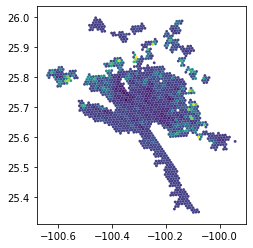

In [8]:
hex_merge = hex_pop.merge(hex_tp, on='hex_id_8')
hex_merge.plot('T_Pob_10_20')

<AxesSubplot:>

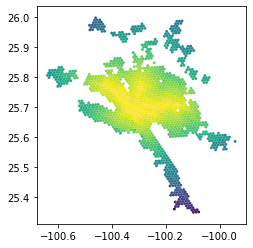

In [9]:
hex_merge.plot('time_paradas_transporte', 'viridis_r')

## Probability density function

### Create groups for disaggregate time intervals

In [12]:
time_analysis = [0, 10, 20, 30, 60, 120, 180, 270, 10000]
hex_merge['time_group'] = np.nan

for i in range(1,len(time_analysis)):
    min_time = time_analysis[i-1]
    max_time = time_analysis[i]
    hex_merge.loc[(hex_merge.time_paradas_transporte>min_time)&
                 (hex_merge.time_paradas_transporte<=max_time), 'time_group'] = f'{time_analysis[i]}_min'

### Group analysis

In [13]:
hex_merge.groupby('time_group').count()

,hex_id_8,T_Pob_10_20,T_Viv_10_20,R_VivDes_20,geometry,time_paradas_transporte
time_group,,,,,,
10000_min,398,398,398,387,398,398
10_min,49,49,49,49,49,49
120_min,291,291,291,278,291,291
180_min,236,236,236,213,236,236
20_min,68,68,68,67,68,68
270_min,224,224,224,199,224,224
30_min,72,72,72,71,72,72
60_min,147,147,147,147,147,147


In [14]:
hex_agg = hex_merge[['time_group','T_Pob_10_20']].groupby('time_group').agg(['mean','median'])
hex_agg['T_Pob_10_20'].sort_values('median')

,mean,median
time_group,,
20_min,-356.955882,-442.5
10_min,-323.040816,-421.0
30_min,-170.291667,-230.0
60_min,241.748299,-2.0
10000_min,866.165829,57.0
120_min,595.680412,88.0
180_min,1286.919492,287.0
270_min,1358.013393,405.0


### Take random sample of data

In [15]:
hex_pdf = gpd.GeoDataFrame()
sample_size = 40

for t in list(hex_merge.time_group.unique()):
    if t == f'{time_analysis[-1]}_min':
        continue
    else:
        hex_tmp = hex_merge.loc[hex_merge.time_group==t].sample(sample_size).copy()
        hex_pdf = pd.concat([hex_pdf, hex_tmp], ignore_index = True, axis = 0)

### Kernel density 

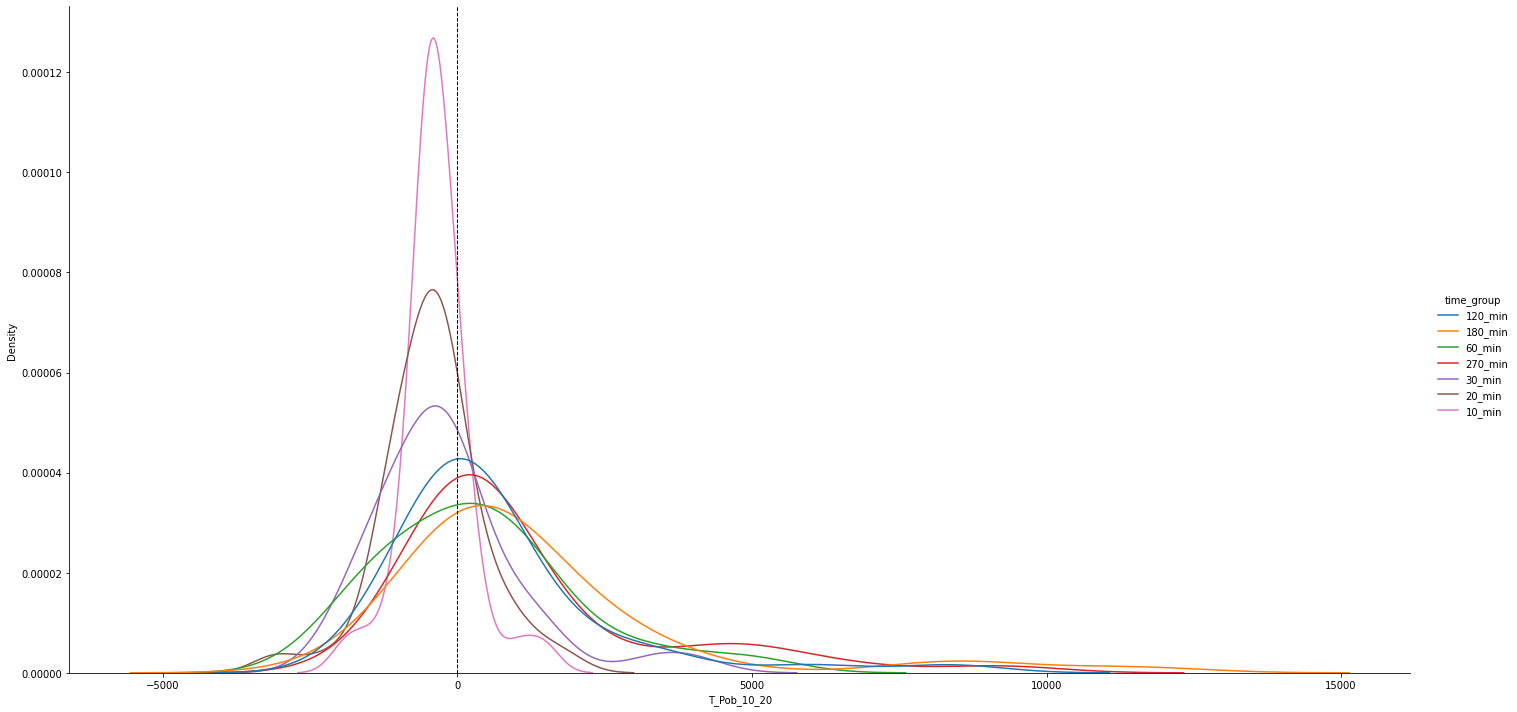

In [16]:
g = sns.displot(data=hex_pdf, x="T_Pob_10_20", hue="time_group", kind="kde",
           height=10, aspect=2)
g.refline(x = 0,
          color = "black",
         lw = 1)

In [17]:
grl_dir = '/workspaces/accesibilidad-urbana/output/figures/pop_change/'
g.savefig(grl_dir+f'{c}_HexRes{res}_density_plot_disaggregated.svg')

### Create groups for aggregated time intervals

In [18]:
time_analysis = [0, 30, 10000]
hex_merge['time_group'] = np.nan

for i in range(1,len(time_analysis)):
    min_time = time_analysis[i-1]
    max_time = time_analysis[i]
    hex_merge.loc[(hex_merge.time_paradas_transporte>min_time)&
                 (hex_merge.time_paradas_transporte<=max_time), 'time_group'] = f'{time_analysis[i]}_min'

In [19]:
hex_merge.groupby('time_group').count()

,hex_id_8,T_Pob_10_20,T_Viv_10_20,R_VivDes_20,geometry,time_paradas_transporte
time_group,,,,,,
10000_min,1296,1296,1296,1224,1296,1296
30_min,189,189,189,187,189,189


In [20]:
hex_agg = hex_merge[['time_group','T_Pob_10_20']].groupby('time_group').agg(['mean','median'])
hex_agg['T_Pob_10_20'].sort_values('median')

,mean,median
time_group,,
30_min,-277.052910,-378.0
10000_min,896.236111,125.5


In [21]:
hex_pdf = gpd.GeoDataFrame()
sample_size = 50

for t in list(hex_merge.time_group.unique()):
    hex_tmp = hex_merge.loc[hex_merge.time_group==t].sample(sample_size).copy()
    hex_pdf = pd.concat([hex_pdf, hex_tmp], ignore_index = True, axis = 0)

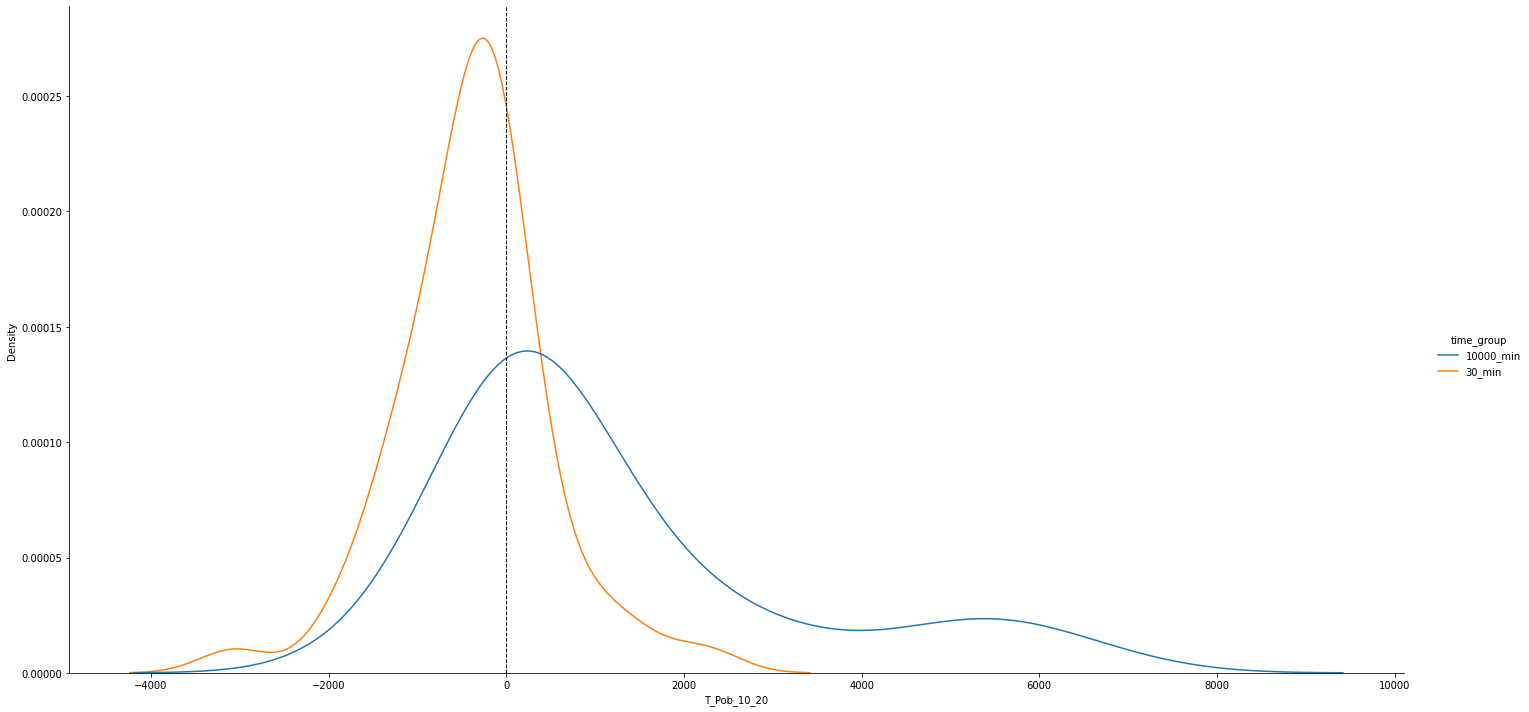

In [22]:
g = sns.displot(data=hex_pdf, x="T_Pob_10_20", hue="time_group", kind="kde",
           height=10, aspect=2)
g.refline(x = 0,
          color = "black",
         lw = 1)

In [23]:
grl_dir = '/workspaces/accesibilidad-urbana/output/figures/pop_change/'
g.savefig(grl_dir+f'{c}_HexRes{res}_density_plot_aggregated.svg')

## Histogram

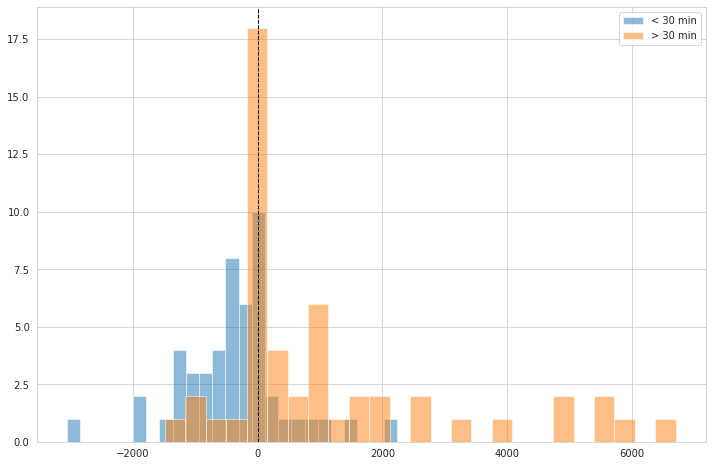

In [24]:
column_analysis = 'T_Pob_10_20'
bins = 25

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(12,8))

plt.hist(hex_pdf.loc[hex_pdf.time_group=='30_min',column_analysis], 
         bins, alpha=0.5, label='< 30 min')
plt.hist(hex_pdf.loc[hex_pdf.time_group=='10000_min',column_analysis], 
         bins, alpha=0.5, label='> 30 min')
plt.axvline(0, ls='--', lw=1, color='black')
plt.legend(loc='upper right')

grl_dir = '/workspaces/accesibilidad-urbana/output/figures/pop_change/'
plt.savefig(grl_dir+f'{c}_HexRes{res}_histogram_aggregated.svg')

plt.show()

## Time bins

In [25]:
time_analysis = [0, 10, 20, 30, 60, 120, 180, 270, 10000]
hex_merge['time_group'] = np.nan

for i in range(1,len(time_analysis)):
    min_time = time_analysis[i-1]
    max_time = time_analysis[i]
    hex_merge.loc[(hex_merge.time_paradas_transporte>min_time)&
                 (hex_merge.time_paradas_transporte<=max_time), 'time_group'] = f'{time_analysis[i]}_min'

In [26]:
hex_agg = hex_merge[['time_group','T_Pob_10_20']].groupby('time_group').agg(['mean','median'])
hex_agg['T_Pob_10_20'].sort_values('median')

,mean,median
time_group,,
20_min,-356.955882,-442.5
10_min,-323.040816,-421.0
30_min,-170.291667,-230.0
60_min,241.748299,-2.0
10000_min,866.165829,57.0
120_min,595.680412,88.0
180_min,1286.919492,287.0
270_min,1358.013393,405.0


In [27]:
hex_boxplot = gpd.GeoDataFrame()
sample_size = 40

for t in list(hex_merge.time_group.unique()):
    if t == f'{time_analysis[-1]}_min':
        continue
    else:
        hex_tmp = hex_merge.loc[hex_merge.time_group==t].sample(sample_size).copy()
        hex_boxplot = pd.concat([hex_boxplot, hex_tmp], ignore_index = True, axis = 0)

In [28]:
from pandas.api.types import CategoricalDtype

In [29]:
#categorical data
cat_list = [f'{t}_min' for t in time_analysis]

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_boxplot['time_group'] = hex_boxplot['time_group'].astype(cat_size_order)
hex_boxplot = hex_boxplot.sort_values('time_group')

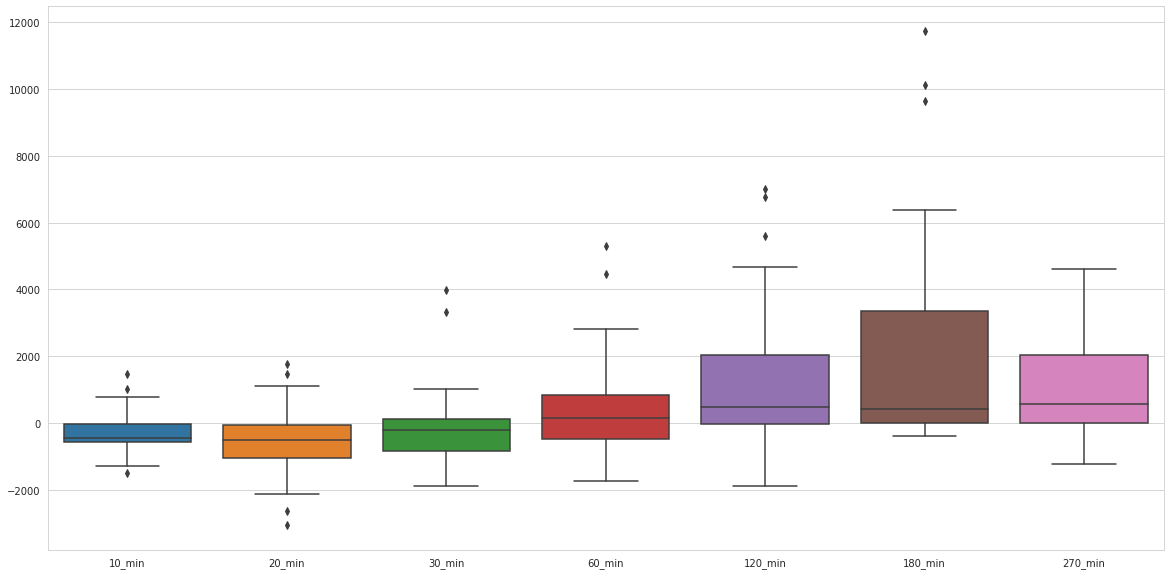

In [30]:
fig, ax = plt.subplots(figsize=(20,10))

g = sns.boxplot(x=np.array(hex_boxplot.time_group) , y=np.array(hex_boxplot.T_Pob_10_20), ax=ax)

grl_dir = '/workspaces/accesibilidad-urbana/output/figures/pop_change/'
plt.savefig(grl_dir+f'{c}_HexRes{res}_boxplot_disaggregated.svg')

In [31]:
x = np.array(hex_boxplot.time_paradas_transporte)
y = np.array(hex_boxplot.T_Pob_10_20)
np.corrcoef(x, y)

array([[1.        , 0.34401448],
       [0.34401448, 1.        ]])

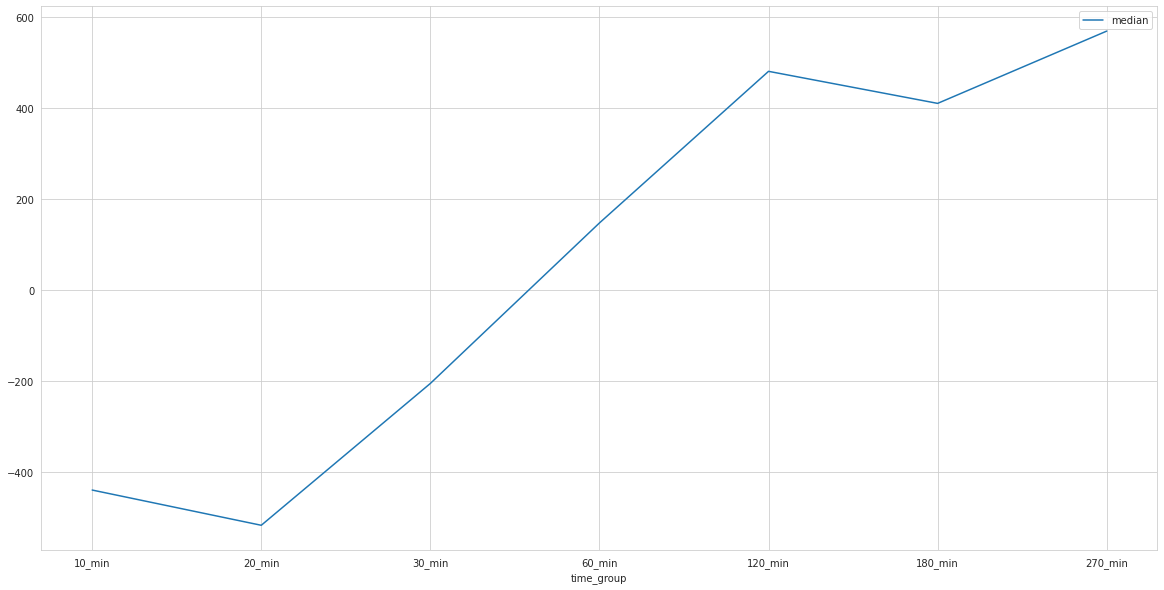

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
hex_agg = hex_boxplot[['time_group','T_Pob_10_20']].groupby('time_group').agg(['median'])
idx = hex_agg['T_Pob_10_20']['median'].isna()
hex_agg['T_Pob_10_20'].loc[~idx].plot(ax=ax)

grl_dir = '/workspaces/accesibilidad-urbana/output/figures/pop_change/'
plt.savefig(grl_dir+f'{c}_HexRes{res}_line_disaggregated.svg')
plt.show()

## Case study

### Gather mass public transport stations data

In [33]:
c = 'Guadalajara'
res = 8

In [34]:
grl_dir = '/workspaces/accesibilidad-urbana/data/external/amg_tp/'
est_gdf = gpd.read_file(grl_dir+f'vwEstaciones_masivo_2020.shp', driver='ESRIShapefile')
print(est_gdf.shape)
est_gdf.head(2)

(119, 6)


,Nombre_de_,Sistema,Estructura,Estado,Línea_y_si,geometry
0,San Juan de Ocotán,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Periférico,MULTIPOINT (662315.284 2290788.242)
1,8 de Julio,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Periférico,MULTIPOINT (668890.558 2276995.459)


<AxesSubplot:>

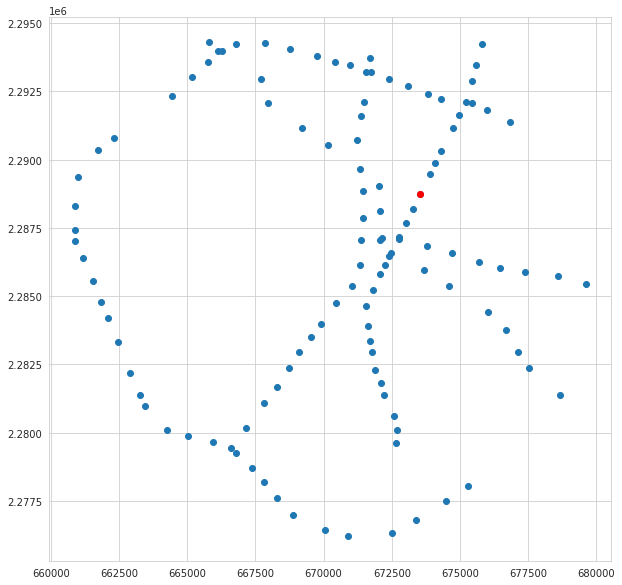

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
est_gdf.plot(ax=ax)
est_gdf.loc[est_gdf.Nombre_de_=='Ciencias de la Salud'].plot(color='red', ax=ax)

### Create 1km buffer for selected station

In [36]:
est_gdf_ = est_gdf.loc[est_gdf.Nombre_de_=='Ciencias de la Salud'].reset_index().copy()
est_buffer = est_gdf_.buffer(1000)

### Download blocks from database

In [37]:
est_buffer = est_buffer.to_crs("EPSG:4326")
poly_wkt = est_buffer.geometry.to_wkt()[0]

#### 2010

In [38]:
folder = 'censo_mza'
table = 'censo_mza_2010'
query = f"SELECT * FROM {folder}.{table} WHERE ST_Intersects(geometry, \'SRID=4326;{poly_wkt}\')"
mza_10 = aup.gdf_from_query(query, geometry_col='geometry')
mza_10 = mza_10[['CVEGEO','pobtot']].copy()
print(mza_10.shape)
mza_10.head(2)

(380, 2)


,CVEGEO,pobtot
0,1403900010399001,89
1,1403900010399003,115


#### 2020

In [39]:
folder = 'censo_mza'
table = 'censo_mza_2020'
query = f"SELECT * FROM {folder}.{table} WHERE ST_Intersects(geometry, \'SRID=4326;{poly_wkt}\')"
mza_20 = aup.gdf_from_query(query, geometry_col='geometry')
mza_20 = mza_20[['CVEGEO','POBTOT','geometry']].copy()
print(mza_20.shape)
mza_20.head(2)

(385, 3)


,CVEGEO,POBTOT,geometry
0,1403900011170032,104,"POLYGON ((-103.33403 20.68122, -103.33379 20.6..."
1,1403900011170016,71,"POLYGON ((-103.33238 20.68124, -103.33237 20.6..."


In [40]:
mza_10_20 = mza_20.merge(mza_10, on='CVEGEO')
print(mza_10_20.shape)
mza_10_20.head(2)

(380, 4)


,CVEGEO,POBTOT,geometry,pobtot
0,1403900011170032,104,"POLYGON ((-103.33403 20.68122, -103.33379 20.6...",124
1,1403900011170016,71,"POLYGON ((-103.33238 20.68124, -103.33237 20.6...",71


<AxesSubplot:>

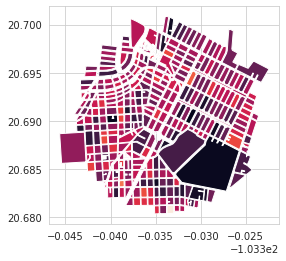

In [41]:
mza_10_20['T_Pob_10_20'] = mza_10_20['POBTOT'] - mza_10_20['pobtot']
mza_10_20.plot('T_Pob_10_20')

In [42]:
mza_10_20 = mza_10_20.to_crs("EPSG:32613")

<AxesSubplot:>

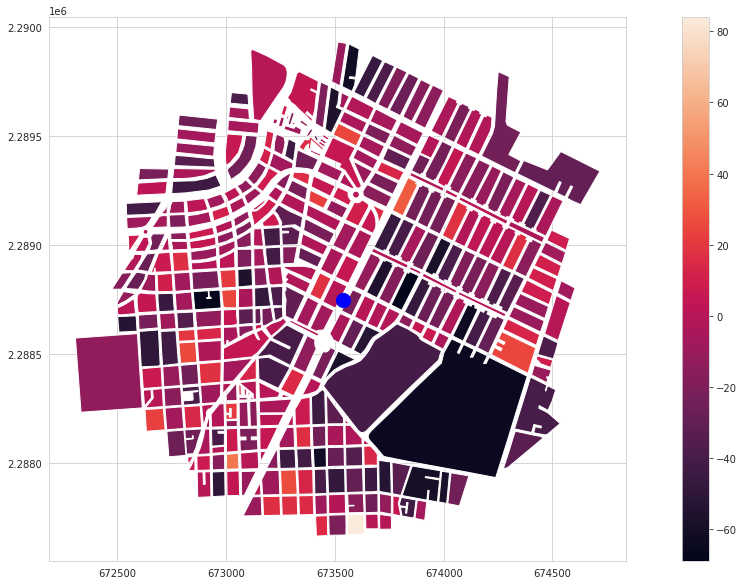

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
# est_gdf.plot(ax=ax)
est_gdf_.plot(color='blue', markersize=200, zorder=2, ax=ax)
mza_10_20.plot('T_Pob_10_20', legend=True, ax=ax)

In [44]:
grl_dir = '/workspaces/accesibilidad-urbana/data/processed/pop_change/'
mza_10_20.to_file(grl_dir+f'{c}_BlockPopChange10_20_TPBuffer1km.shp', driver='GeoJSON')